## sensingResponse _ 2bins 70/30 _ lr = 3e-4 _ 100 epochs

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import Any, Collection, Dict, List, Optional, Tuple, Union
from numpy.typing import ArrayLike
from fastcore.all import L
import pycm

In [3]:
def evaluate_classification(
    y_true: ArrayLike,
    y_pred: ArrayLike,
) -> Dict[str, Any]:
    """Evaluate a classification task.

    Args:
        y_true (ArrayLike): The true labels.
        y_pred (ArrayLike): The predicted labels.

    Returns:
        Dict[str, Any]: A dictionary of metrics.
    """
    might_have_rounded_floats = False
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length."
    y_true = L([int(x) for x in y_true])

    y_pred_new = []
    int_indices = []
    for i, x in enumerate(y_pred):
        try:
            x_int = int(x)
            if x_int != x:
                might_have_rounded_floats = True
                logger.warning("y_pred contains rounded floats.")
            y_pred_new.append(x_int)
            int_indices.append(i)
        except Exception as e:
            y_pred_new.append(None)
    y_pred_new = L(y_pred_new)

    frac_valid = len(int_indices) / len(y_true)
    if len(int_indices) == 0:
        logger.warning("No valid predictions found.")
        y_pred_valid = L([None] * len(y_true))
        y_true_valid = y_true

    else:
        y_true_valid = y_true[int_indices]
        y_pred_valid = y_pred_new[int_indices]

    cm = pycm.ConfusionMatrix(list(y_true_valid), list(y_pred_valid))
    return {
        "accuracy": cm.Overall_ACC,
        "acc_macro": cm.ACC_Macro,
        "racc": cm.Overall_RACC,
        "kappa": cm.Kappa,
        "confusion_matrix": cm,
        "f1_macro": cm.F1_Macro,
        "f1_micro": cm.F1_Micro,
        "frac_valid": frac_valid,
        "all_y_true": y_true,
        "all_y_pred": y_pred,
        "valid_indices": int_indices,
        "might_have_rounded_floats": might_have_rounded_floats,
    }

In [4]:
from glob import glob
from fastcore.xtras import load_pickle
import os 
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt 
import matplotlib as mpl
#import seaborn as sns
import numpy as np 

from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 3.25
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

import sys

sys.path.append("../plotutils/")
from plotutils import *

plt.style.use("../plotutils/your.mplstyle")

import matplotx

In [5]:
all_res = glob(f"./*.pkl")
print(f"Pickles found: {len(all_res)}")

Pickles found: 35


### ADJUST dictionary according to experiment

In [6]:
compiled_res_list = []
conf_mats = []

for res in all_res:
    res = load_pickle(res)
    try:
        results = evaluate_classification(res["targets"], res["predictions"])
    except:
        results = evaluate_classification(res["true"], res["predictions"])
    summary = {
        'train_size': res['train_size'],
        'accuracy': results['accuracy'],
        'acc_macro': results['acc_macro'],
        'racc': results['racc'],
        'kappa': results['kappa'],
        'f1_macro': results['f1_macro'],
        'f1_micro': results['f1_micro'],
        'frac_valid': results['frac_valid'],
        'valid_indices': results['valid_indices'],
        'might_have_rounded_floats': results['might_have_rounded_floats'],
    }
    
    confusion_matrix = {
        'all_y_true': results['all_y_true'],
        'all_y_pred': results['all_y_pred']
    }
    
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

In [7]:
compiled_res = pd.DataFrame(compiled_res_list)

In [8]:
compiled_res = compiled_res.sort_values(['train_size']).iloc[:, 0:8]
compiled_res

,train_size,accuracy,acc_macro,racc,kappa,f1_macro,f1_micro,frac_valid
0,15,0.707317,0.707317,0.666865,0.121429,0.534091,0.707317,1.0
14,15,0.853659,0.853659,0.565735,0.663014,0.831044,0.853659,1.0
21,15,0.756098,0.756098,0.585961,0.410920,0.705460,0.756098,1.0
7,15,0.707317,0.707317,0.565735,0.326027,0.662088,0.707317,1.0
28,15,0.756098,0.756098,0.666865,0.267857,0.611742,0.756098,1.0
22,20,0.833333,0.833333,0.597222,0.586207,0.792308,0.833333,1.0
15,20,0.888889,0.888889,0.597222,0.724138,0.861538,0.888889,1.0
8,20,0.777778,0.777778,0.597222,0.448276,0.723077,0.777778,1.0
1,20,0.694444,0.694444,0.608025,0.220472,0.606753,0.694444,1.0
29,20,0.777778,0.777778,0.662037,0.342466,0.645320,0.777778,1.0


### ADJUST columns according to grouping

In [9]:
grouped_res = compiled_res.groupby(['train_size']).agg(['mean', 'sem'])
grouped_res

accuracy           acc_macro                racc            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
15          0.756098  0.026718  0.756098  0.026718  0.610232  0.023413   
20          0.794444  0.032394  0.794444  0.032394  0.612346  0.012598   
25          0.845161  0.048279  0.845161  0.048279  0.566285  0.014570   
30          0.861538  0.028782  0.861538  0.028782  0.562130  0.015086   
35          0.819048  0.034993  0.819048  0.034993  0.595918  0.023624   
40          0.825000  0.030619  0.825000  0.030619  0.589063  0.011482   
45          0.872727  0.046355  0.872727  0.046355  0.595041  0.024095   

               kappa            f1_macro            f1_micro            \
                mean       sem      mean       sem      mean       sem   
train_size                                                               
15          0.357849  0.089707  0.668885  0.049555  0.756098  0.026718   
20          0.464312  0.088580  0.725799  0.046640  0.794444  0.032394   
25          0.655893  0.099439  0.825681  0.051036  0.845161  0.048279   
30          0.690206  0.055231  0.843548  0.028469  0.861538  0.028782   
35          0.557822  0.070513  0.775132  0.036375  0.819048  0.034993   
40          0.571354  0.078165  0.783636  0.039853  0.825000  0.030619   
45          0.676663  0.119641  0.834127  0.061855  0.872727  0.046355   

           frac_valid       
                 mean  sem  
train_size                  
15                1.0  0.0  
20                1.0  0.0  
25                1.0  0.0  
30                1.0  0.0  
35                1.0  0.0  
40                1.0  0.0  
45                1.0  0.0

[[0.9 0.1]
 [0.2 0.8]]
accuracy: 0.8500000000000001


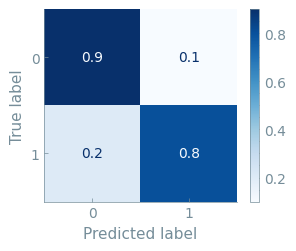

In [10]:
index_maxsize = compiled_res[compiled_res["train_size"]==max(compiled_res["train_size"])].index
conf_mats_max = [conf_mats[i] for i in index_maxsize]
confusion_matrix_max = []
for index, _ in enumerate(conf_mats_max):
    try:
        preds = conf_mats_max[index]
        actual = preds["all_y_true"]
        predicted = preds["all_y_pred"]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        confusion_matrix_max.append(confusion_matrix)
    except Exception as e:
        print(e)
norm_confusion_matrix = sum(confusion_matrix_max)/[[sum(sum(confusion_matrix_max)[0])], [sum(sum(confusion_matrix_max)[1])]]
print(norm_confusion_matrix)

acc1=0
for i in range(len(norm_confusion_matrix)):
    acc=norm_confusion_matrix[i][i]
    acc1=acc1+acc
acc=acc1/sum(sum(norm_confusion_matrix))

print(f'accuracy: {acc}')

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = norm_confusion_matrix, display_labels = [0, 1])
cm_display.plot(cmap=plt.cm.Blues)
plt.savefig('classif_sensing_confusionMatrix_70_30_100ep_size45.pdf', bbox_inches='tight')

In [11]:
sizes = np.sort(compiled_res["train_size"].unique())

In [12]:
print(grouped_res.loc[np.sort(sizes), :]['accuracy'])

                mean       sem
train_size                    
15          0.756098  0.026718
20          0.794444  0.032394
25          0.845161  0.048279
30          0.861538  0.028782
35          0.819048  0.034993
40          0.825000  0.030619
45          0.872727  0.046355


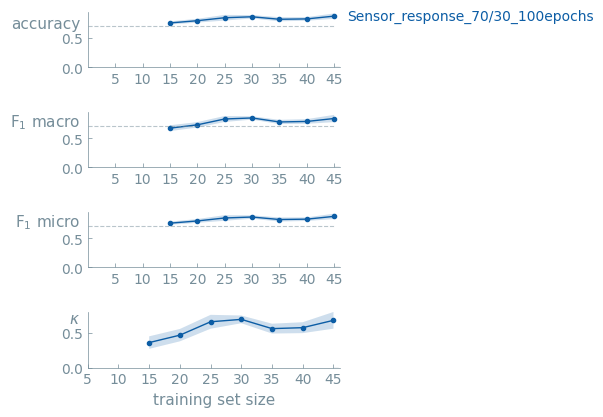

In [13]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

n_bins = 2
representations = ["70/30_100epochs"]

for representation in representations:
    ax[0].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean'],
        marker='o',
        label=f'Sensor_response_{representation}'
    )
    ax[0].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['accuracy']['mean']
        -grouped_res.loc[sizes, :]['accuracy']['sem'],
        grouped_res.loc[sizes, :]['accuracy']['mean']
        +grouped_res.loc[sizes, :]['accuracy']['sem'],
        alpha = 0.2
    )
    
    ax[0].hlines(0.95, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[0].hlines(0.7, 0, 45, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[0].hlines(0, 45, 46, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top('accuracy', ax=ax[0])
    ax[0].set_xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])

    ax[1].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[1].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        -grouped_res.loc[sizes, :]['f1_macro']['sem'],
        grouped_res.loc[sizes, :]['f1_macro']['mean']
        +grouped_res.loc[sizes, :]['f1_macro']['sem'],
        alpha=0.2
    )

    ax[1].hlines(0.95, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[1].hlines(0.7, 0, 45, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[1].hlines(0, 45, 46, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ macro', ax=ax[1])
    ax[1].set_xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])

    ax[2].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean'],
        marker='o',
        label=f'{representation}'
    )

    ax[2].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        -grouped_res.loc[sizes, :]['f1_micro']['sem'],
        grouped_res.loc[sizes, :]['f1_micro']['mean']
        +grouped_res.loc[sizes, :]['f1_micro']['sem'],
        alpha=0.2
    )

    ax[2].hlines(0.95, 0, 0, linestyle='--', color='#758D99', alpha=0.5)
    ax[2].hlines(0.7, 0, 45, linestyle='--', color='#758D99', alpha=0.5, linewidth=0.8)
    ax[2].hlines(0, 45, 46, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'F$_1$ micro', ax=ax[2])
    ax[2].set_xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])

    ax[3].plot(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean'],
        marker='o',
        label=f'{representation}'
    )
    ax[3].fill_between(
        grouped_res.loc[sizes, :].index,
        grouped_res.loc[sizes, :]['kappa']['mean']
        -grouped_res.loc[sizes, :]['kappa']['sem'],
        grouped_res.loc[sizes, :]['kappa']['mean']
        +grouped_res.loc[sizes, :]['kappa']['sem'],
        alpha=0.2
    )
    
    ax[3].hlines(0, 45, 46, linestyle='--', color='#758D99', alpha=0.5)
    ylabel_top(r'$\kappa$', ax=ax[3])
    ax[3].set_xticks([5, 10, 15, 20, 25, 30, 35, 40, 45])

ax[-1].set_xlabel('training set size')

matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.8, top=1, bottom=0.2)
fig.savefig('classif_sensing_70_30_100ep.pdf', bbox_inches='tight')